In notebook 1, I have pre-processed and cleaning the data, and saved it in a new csv named data_cleaned.csv. I will import this cleaned csv file in this notebook to perform exploratory data analysis. 

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the data
airbnb = pd.read_csv(r'C:\Users\upasa\OneDrive\Desktop\Coding Challenge\data_cleaned.csv')

Price is an important paramter to be considered while renting an Airbnb. There are various parameters that would increase the price of the house. Through visualization I will be explaining the parameters that affects the mean price. 

### 1. Number of listings in each neighborhood

In [3]:
import folium
from folium.plugins import FastMarkerCluster
from branca.colormap import LinearColormap

latitude = airbnb['latitude'].tolist()
longitude = airbnb['longitude'].tolist()
mapping = list(zip(latitude, longitude))

mapped = folium.Map(location=[52.3680, 4.9036], zoom_start=11.5)
FastMarkerCluster(data=mapping).add_to(mapped)
mapped

### 2. Room types listing

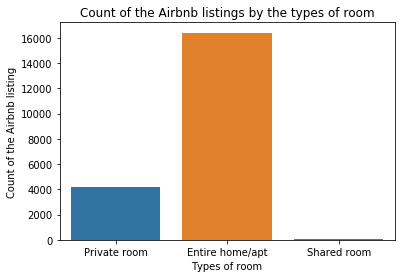

In [4]:
ax = sns.countplot(x="room_type", data=airbnb)
plt.xlabel("Types of room")
plt.ylabel("Count of the Airbnb listing")
plt.title("Count of the Airbnb listings by the types of room")
plt.figsize = (20,9)
plt.show()

Most of the listings are for Entire home or apartment type. Where as people prefer the least for shared rooms may be because of the privacy issue. 

### 3. No of listings based on Property type

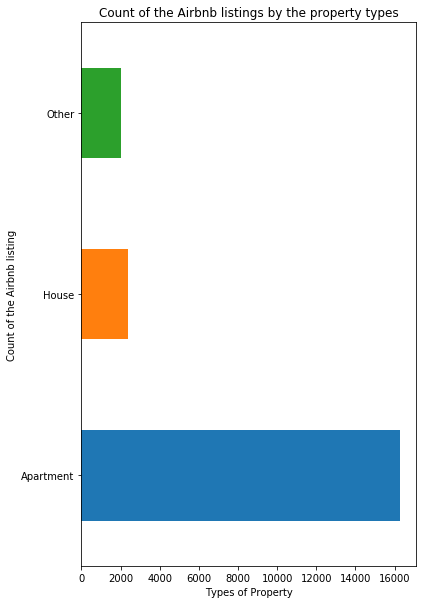

In [5]:
airbnb['property_type'].value_counts().head(30).plot(kind='barh', figsize=(6,10))
plt.xlabel("Types of Property")
plt.ylabel("Count of the Airbnb listing")
plt.title("Count of the Airbnb listings by the property types")
plt.show()

Most of the people prefer renting an entire home and so they prefer renting whole apartment. Hence the count for the apartment is the highest, followed by the house. This might be because the no of guest that can coomodate in an apartment would be more. If people are renting an entire apartment, they would get privacy to enjoy. 

### 4. No of listing versus accomodates

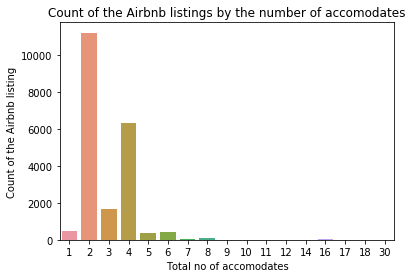

In [6]:
ax = sns.countplot(x="accommodates", data=airbnb)
plt.xlabel("Total no of accomodates")
plt.ylabel("Count of the Airbnb listing")
plt.title("Count of the Airbnb listings by the number of accomodates")
plt.figsize = (20,9)
plt.show()

Maximum listing is for 2 people followed by 4 people. Whereas it is least for more then 6 people. Since the highest listing is for 2 people, I will se ethe average daily price for 2 people in each neighborhood below. 

### 5. Reviewing the scores based on various parameters:

####  Overall Experience score

Text(0.5,0,'Average review score')

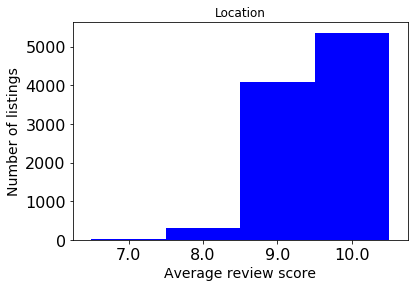

In [7]:
listings10 = airbnb[airbnb['number_of_reviews']>=10]

plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)

feq=listings10['review_scores_location'].value_counts().sort_index()
ax1=feq.plot.bar(color='b', width=1, rot=0)
plt.title("Location", fontsize=12)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

####  Cleanliness score

Text(0.5,0,'Average review score')

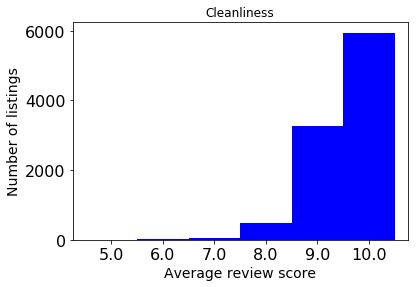

In [8]:
feq=listings10['review_scores_cleanliness'].value_counts().sort_index()
ax2=feq.plot.bar(color='b', width=1, rot=0)
plt.title("Cleanliness", fontsize=12)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

####  Score of Accuracy

Text(0.5,0,'Average review score')

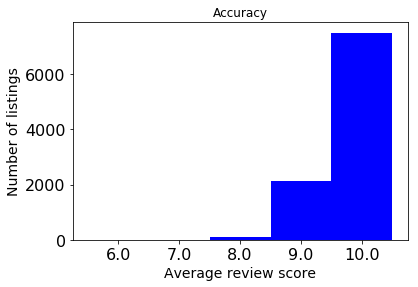

In [9]:
feq=listings10['review_scores_accuracy'].value_counts().sort_index()
ax6=feq.plot.bar(color='b', width=1, rot=0)
plt.title("Accuracy", fontsize=12)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

####  Value score 

Text(0.5,0,'Average review score')

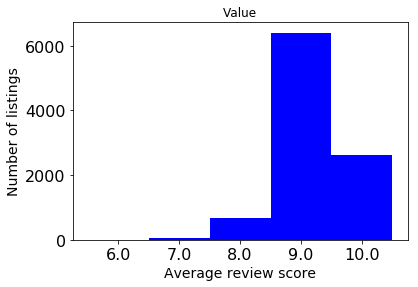

In [10]:
feq=listings10['review_scores_value'].value_counts().sort_index()
ax3=feq.plot.bar(color='b', width=1, rot=0)
plt.title("Value", fontsize=12)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

####  Score of communication

Text(0.5,0,'Average review score')

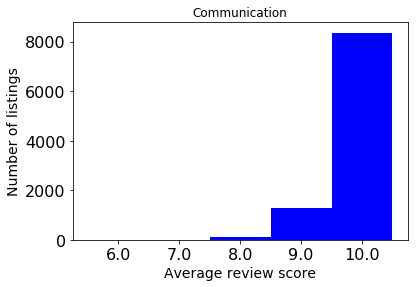

In [11]:
feq=listings10['review_scores_communication'].value_counts().sort_index()
ax4=feq.plot.bar(color='b', width=1, rot=0)
plt.title("Communication", fontsize=12)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

####  Arrival Score

Text(0.5,0,'Average review score')

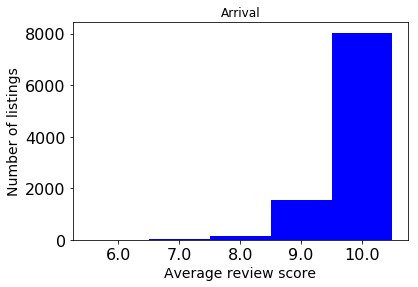

In [12]:
feq=listings10['review_scores_checkin'].value_counts().sort_index()
ax5=feq.plot.bar(color='b', width=1, rot=0)
plt.title("Arrival", fontsize=12)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

### 6. Calculate average price in each neighborhood

First I will calculate the price for per person

In [13]:
#Obtaining the number of people that can be accommodated but are not included in the price
extra_space = (airbnb['accommodates'] - airbnb['guests_included'])

#Due to inconsistencies in the imported data this number is negative in some rare cases. We floor it to 0.
extra_space = extra_space.apply(lambda x: 0 if x<0 else x)

#Calculating the extra costs
extra_price = extra_space*airbnb['extra_people']

In [14]:
airbnb['price_per_person'] = (airbnb.price+ extra_price) / airbnb['accommodates']

In [15]:
airbnb['price_per_person'].describe()

count    20677.000000
mean        61.203829
std         55.388154
min          0.000000
25%         42.500000
50%         54.500000
75%         70.000000
max       3815.000000
Name: price_per_person, dtype: float64

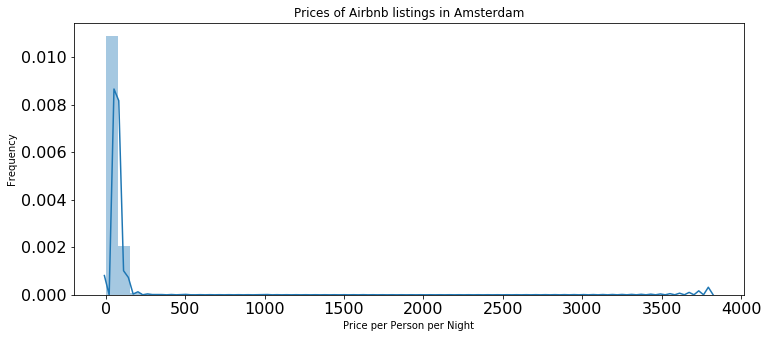

In [16]:
#Distribution of prices
plt.rcParams['figure.figsize'] = [12, 5]
sns.distplot(airbnb['price_per_person']);
plt.xlabel('Price per Person per Night');
plt.ylabel('Frequency');
plt.title('Prices of Airbnb listings in Amsterdam');

In [17]:
#Remove outliers using Tukey rule
IQR = airbnb['price_per_person'].quantile(0.75) - airbnb['price_per_person'].quantile(0.25)
lower_bound = airbnb['price_per_person'].quantile(0.25) - 3*IQR
upper_bound = airbnb['price_per_person'].quantile(0.75) + 3*IQR
lower_bound, upper_bound

(-40.0, 152.5)

In [18]:
#Override lower bound with a positive number 
lower_bound = 5
airbnb = airbnb[(airbnb['price_per_person']>lower_bound) & (airbnb['price_per_person']<upper_bound)]

In [19]:
airbnb.shape

(20437, 42)

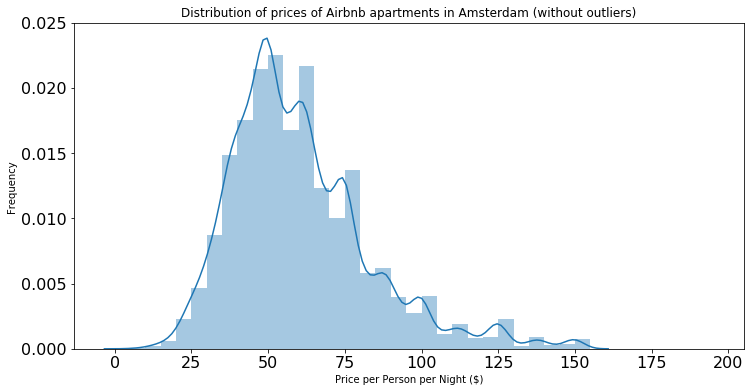

In [20]:
#Distribution of prices after removing outliers
plt.rcParams['figure.figsize'] = [12, 6]  
sns.distplot(airbnb['price_per_person'][airbnb["room_type"]=='Entire home/apt'],bins = np.arange(0,200,5));
plt.xlabel('Price per Person per Night ($)');
plt.ylabel('Frequency');
plt.title('Distribution of prices of Airbnb apartments in Amsterdam (without outliers)');

In [21]:
airbnb['price_per_person'].describe()

count    20437.000000
mean        58.190053
std         22.797255
min          6.000000
25%         42.500000
50%         54.000000
75%         70.000000
max        151.500000
Name: price_per_person, dtype: float64

In [22]:
def price_neighborhood(df, filters = None):
    """" Calculates and visualizes the average price per person per night in each neighborhood. 
    Filters can be applied so the analysis can be repeated on different subsets of the original dataframe.
    
    Parameters
    ----------
    df : DataFrame, detailed data of Airbnb listings including their price per person per night
    filters: dict, column (str) and values (list) pairs used to filter the dataset 
    
    Returns
    -------
    avg_prices_df : DataFrame, average price per person per night in each neighborhood
    """
    
    #Empting Filter
    bools = [True]*df.shape[0]
    
    #Combining all the filters
    if filters:
        for column, value in filters.items():
            additional_filter = (df[column].isin(value))
            bools = bools & additional_filter

    #Applying the filters
    df_filtered = df[bools]
        
    #Calculating the average prices in different neighborhoods
    avg_prices = df_filtered.groupby(['neighbourhood_cleansed'])['price_per_person'].mean().sort_values(ascending = False)
    
    #Storing them in a dataframe
    avg_prices_df = pd.DataFrame(avg_prices).reset_index()

    #Visualizing the results
    colors = sns.color_palette('Set1')
    sns.barplot(y = 'neighbourhood_cleansed', x = 'price_per_person', data = df_filtered, 
                order = avg_prices.index, orient='h', color= colors[3], zorder= 2)
    plt.xlabel('Average Price per Person per Night ($)')
    plt.ylabel('')
    plt.title('Average Prices in Amsterdam Neighborhoods')
    plt.subplots_adjust(left=0.35, right=0.9, top=0.95, bottom=0.07)
    plt.grid(axis = 'x', linestyle = '--', zorder=0)

    return avg_prices_df

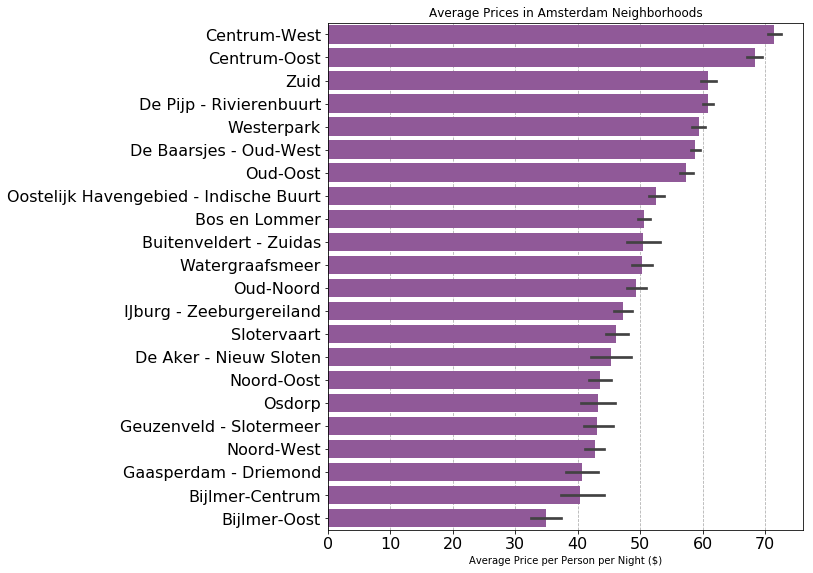

In [23]:
#Average prices for different neighborhoods, all listings
plt.rcParams['figure.figsize'] = [12, 8]
all_avg = price_neighborhood(airbnb);

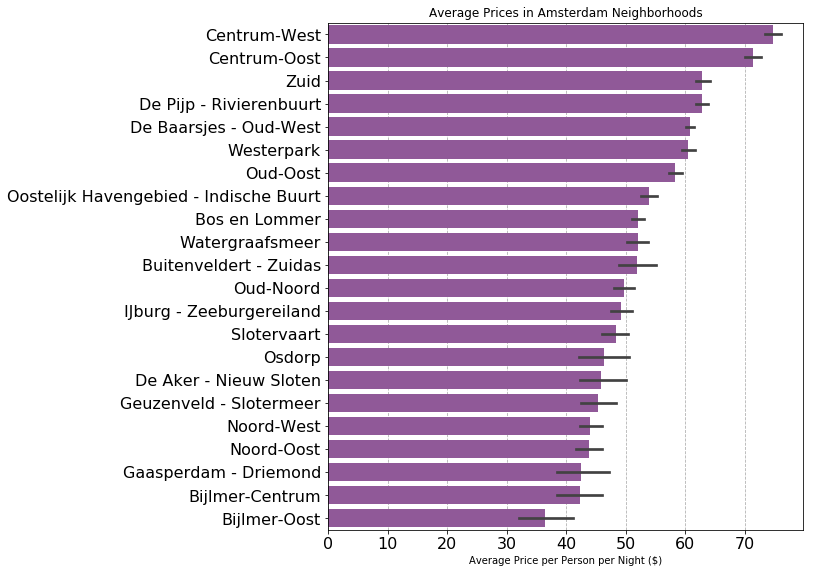

In [24]:
#Average prices for different neighborhoods, entire home/apartment listings only   
homeapt_avg = price_neighborhood(airbnb, {'room_type': ['Entire home/apt']});

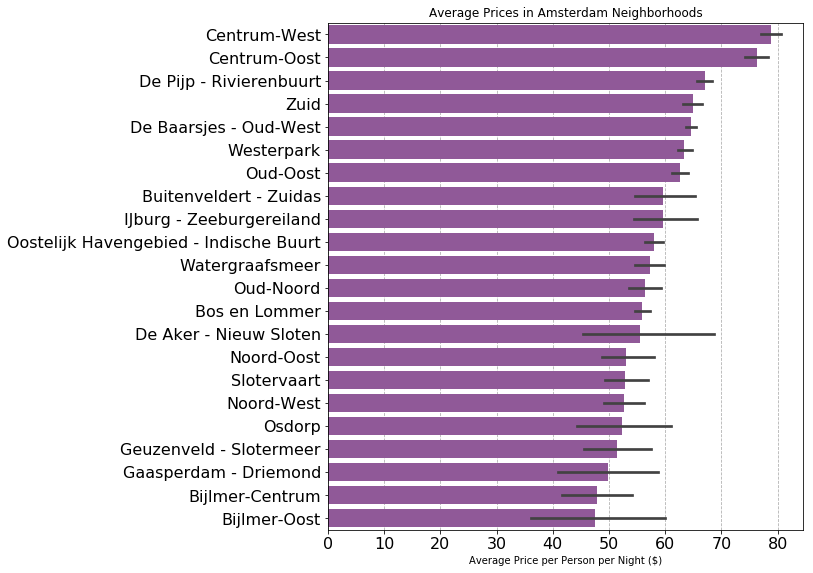

In [25]:
#Average prices for different neighborhoods, entire 2-person home/apartment listings only
homeapt2_avg = price_neighborhood(airbnb, {'room_type': ['Entire home/apt'], 'accommodates':[2]});

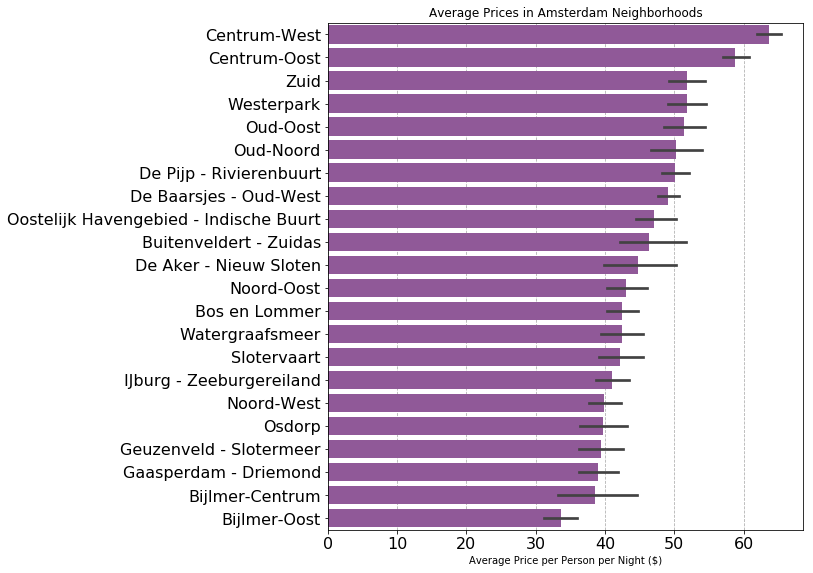

In [26]:
#Average prices for different neighborhoods, private rooms only
private_avg = price_neighborhood(airbnb, {'room_type': ['Private room']});

In [27]:
#Comparing the entire home prices and private room prices
compare = private_avg.merge(homeapt_avg, on = 'neighbourhood_cleansed')
compare['price_per_person_x'] - compare['price_per_person_y']

0    -11.108377
1    -12.594377
2    -11.018982
3     -8.762465
4     -6.979239
5      0.576794
6    -12.737909
7    -11.731352
8     -6.695380
9     -5.515756
10    -1.045899
11    -0.809862
12    -9.587465
13    -9.600739
14    -6.177140
15    -8.281956
16    -4.183238
17    -6.624026
18    -5.921307
19    -3.465147
20    -3.838447
21    -2.827973
dtype: float64

In [28]:
#Correlation between prices of entire homes and private room prices
compare.corr()

,price_per_person_x,price_per_person_y
price_per_person_x,1.000000,0.941401
price_per_person_y,0.941401,1.000000


Entire homes/apartments only: The most expensive areas are the central ones, e.g. Centrum West and Centrum Oost (both more than 70 dollars per person per night), followed by the neighborhoods surrounding them, e.g. Oud-Zuid, De Pijp, De Baarsjes, Westerpark, Oud-Oost (all around 60 dollars). The most affordable Airbnb apartments can be found in the Bijlmer areas located in the eastern part of the city, where the rent will cost roughly 40 dollars on average (per person per night).

Private rooms only: In almost all neighborhoods, private rooms are around 10 dollars cheaper than entire apartments, however, the prices between two types or listings are obviously strongly positively correlated (0.95).

### 7. Identify value-adding features from Airbnb listings' titles

In [29]:
import nltk
nltk.download(['punkt', 'wordnet','stopwords'])
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from scipy.stats import norm

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.multioutput import MultiOutputClassifier
import re

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\upasa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\upasa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\upasa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
def tokenize(text):
    """ Normalize input text, tokenize it into words, remove stopwords and return lemmatized tokens
    
    Parameters
    ----------
    text : str, input text to be tokenized
    
    Returns
    -------
    lemmed: list, lemmatized tokens
    """
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text.lower())
    tokens = word_tokenize(text)
    
    tokens_subset = [v.strip() for v in tokens if v.strip() not in set(stopwords.words('english'))]
    
    lemmatizer = WordNetLemmatizer()
    lemmed = [lemmatizer.lemmatize(w) for w in tokens_subset]
    
    return lemmed

In [31]:
#Finding the most common tokens in listings' names (titles)

#Obtaining matrix of token counts
count = CountVectorizer(tokenizer = tokenize)
names_wordcount = count.fit_transform(airbnb['name'])

#Aggregating to obtain total token count
wordcount_raw = names_wordcount.sum(axis=0)

#Mapping the total token counts to tokens 
wordcount_mapped = [(word, wordcount_raw[0, i]) for word, i in count.vocabulary_.items()]

#Storing the token-count pairs into a dataframe
wordcount_df = pd.DataFrame(wordcount_mapped, columns = ['word','count']).sort_values(by='count', ascending=False)
wordcount_df[:50]

,word,count
30,apartment,8116
40,amsterdam,4873
128,spacious,2438
14,city,2170
3,room,1987
10,centre,1976
84,house,1753
17,near,1734
68,center,1631
1,garden,1609


Split the input dataset into two subsets, separating listings that have a specific keyword in the name or description and the ones that do not. Compare the distribution of prices between the two datasets and construct a confidence interval for the difference in means.
    
Parameters

1. df : DataFrame, detailed data of Airbnb listings including their price per person per night
2. keyword : str, specific keyword used to separate the dataset
3. text_column : str, analyzed column with textual descriptions of properties, 'name' or 'description'
4. filters : dict, column(str) - value(list) pairs used to filter the original dataset
5. plot_text : str, text used in the visualization
6. confidence_level : int, confidence level used to construct confidence intervals

In [32]:
def mean_difference(df, keyword, text_column = 'name', filters = None, plot_text = "", confidence_level = 90):
    
    #Emptying filter
    bools = [True]*df.shape[0]
    
    #Appling filters to obtain the desired subset
    if filters:
        for column, value in filters.items():
            additional_filter = (df[column].isin(value))
            bools = bools & additional_filter
    df = df[bools]
    
    # Checking each name if it includes the input keyword 
    keyword1 = df[text_column].apply(lambda x: 1 if keyword in x.lower() else 0)
    
    # Splitting the input dataframe into two sets - one with the keyword in the name and one without
    prices_keyword = df['price_per_person'][keyword1 == 1]
    prices_other = df['price_per_person'][keyword1 == 0]
    
    #Plotting the distribution
    bins = np.arange(0,200,5)
    sns.distplot(prices_keyword, bins, kde = True, norm_hist = True)
    sns.distplot(prices_other, bins, kde = True, norm_hist = True, color = 'g')
    plt.title(f'Keyword: "{keyword}"')
    plt.xlabel('Price per Person per Night ($)')
    
    #Text in the legend
    if plot_text == "":
        plot_text = keyword
    
    plt.legend([f'Listings advertised as {plot_text}','Other'])
    
    #Calculating the confidence interval for the mean difference
    m1 = prices_keyword.mean()
    m2 = prices_other.mean()
    
    s1 = prices_keyword.std()
    s2 = prices_other.std()
    
    n1 = len(prices_keyword)
    n2 = len(prices_other)
    
    se = np.sqrt((s1 ** 2)/n1 + (s2 ** 2)/n2)
    
    #Sample mean difference
    stat = m1-m2
    
    #Inverse Cumulative Distribution Function
    p = 1 - (1 - confidence_level/100)/2
    critical = norm.ppf(p)
    
    output_str = f'Difference in means: {stat:.2f} (+/- {se * critical:.2f})'
    
    props = dict(boxstyle='round', facecolor='white', alpha=1)
    plt.text(-5, 0.001, output_str , fontsize=18,
        verticalalignment='bottom', bbox = props)

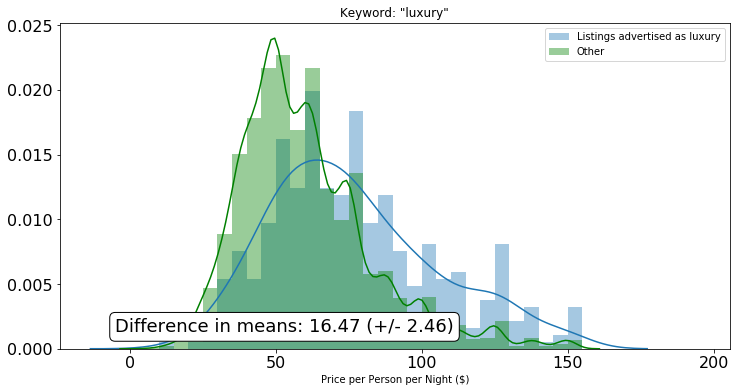

In [33]:
plt.rcParams['figure.figsize'] = [12, 6]
mean_difference(airbnb, 'luxury', filters = {'room_type':['Entire home/apt']})
#plt.savefig('luxury')

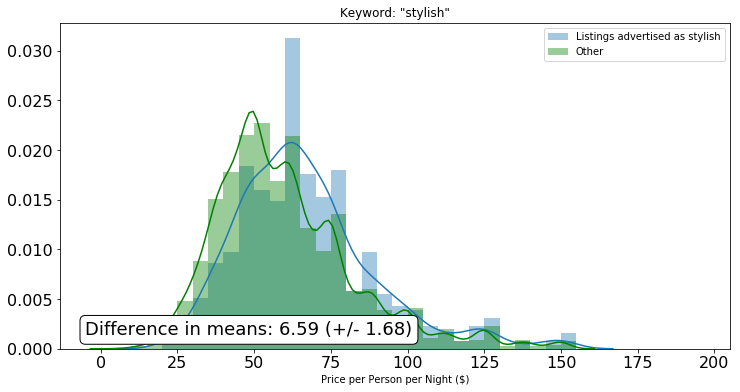

In [34]:
mean_difference(airbnb, 'stylish',  filters = {'room_type':['Entire home/apt']})
#plt.savefig('stylish')

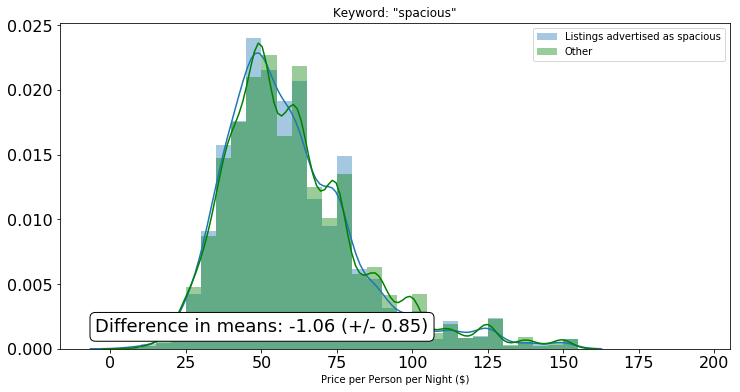

In [35]:
mean_difference(airbnb, 'spacious',  filters = {'room_type':['Entire home/apt']})
#plt.savefig('spacious')

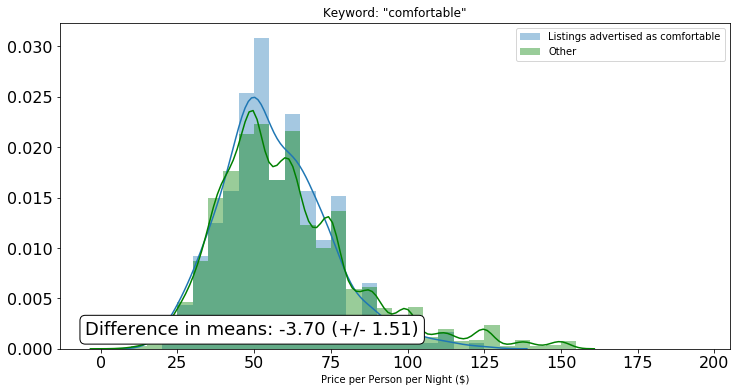

In [36]:
mean_difference(airbnb, 'comfortable', filters = {'room_type':['Entire home/apt']})
#plt.savefig('comfortable')

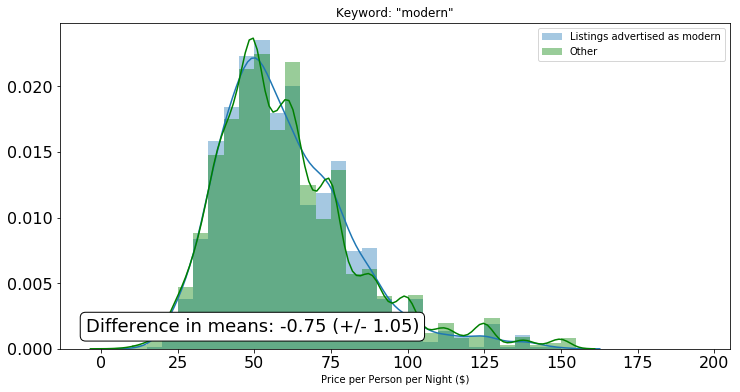

In [37]:
mean_difference(airbnb, 'modern', filters = {'room_type':['Entire home/apt']})
#plt.savefig('modern')

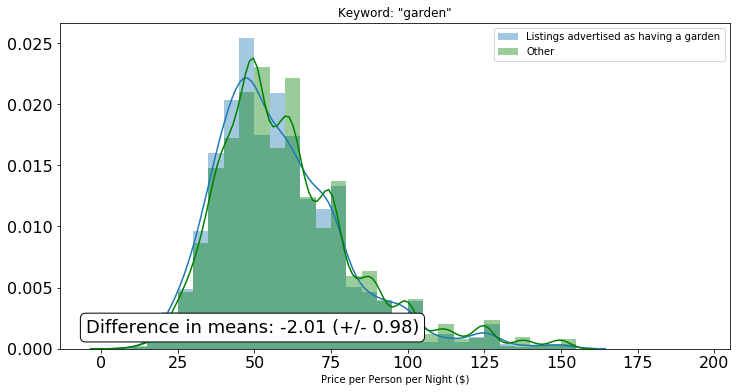

In [38]:
mean_difference(airbnb, 'garden', plot_text = 'having a garden', filters = {'room_type':['Entire home/apt']})
#plt.savefig('garden')

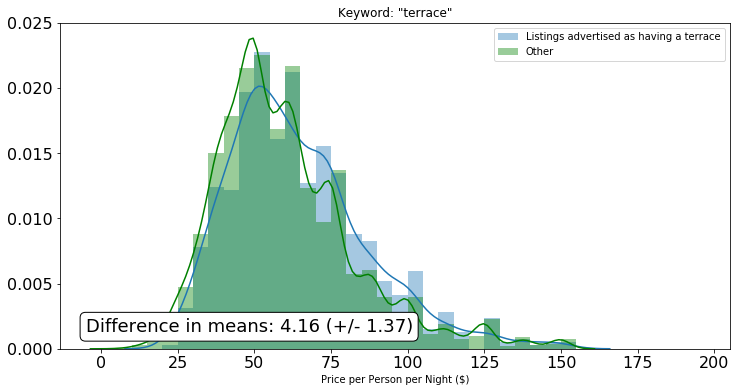

In [39]:
mean_difference(airbnb, 'terrace', plot_text = 'having a terrace', filters = {'room_type':['Entire home/apt']})
#plt.savefig('terrace')

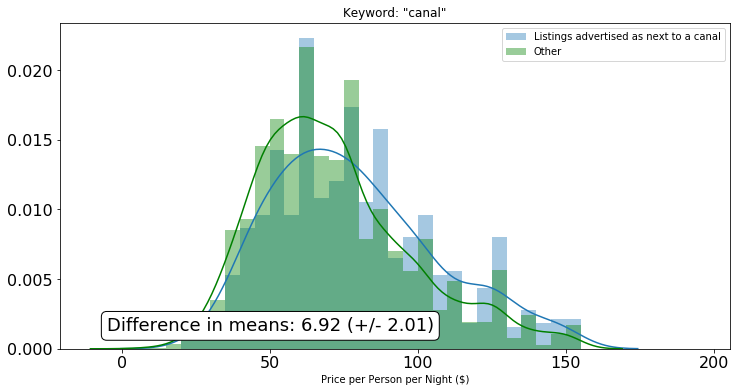

In [40]:
mean_difference(airbnb, 'canal', filters = {'neighbourhood_cleansed' : ['Centrum-West', 'Centrum-Oost'],
                                              'room_type':['Entire home/apt']}, plot_text = 'next to a canal')
#plt.savefig('canal')

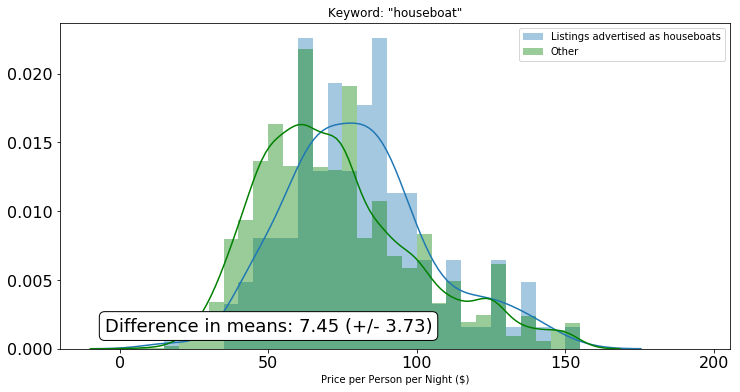

In [41]:
mean_difference(airbnb, 'houseboat', filters = {'neighbourhood_cleansed' : ['Centrum-West', 'Centrum-Oost'],
                                                 'room_type':['Entire home/apt']}, plot_text = 'houseboats')
#plt.savefig('houseboat')

Inference -

Condos publicized as luxury are on normal 15.65 dollars progressively costly (per individual every night) than other Airbnb apartments in Amsterdam. 

Style  appears to be significant as well, as it expands the normal cost by 6.44 dollars. Then again, the apartments promoted as spacious don't accompany altogether various costs. 

Regularly the Airbnb titles likewise notice explicit amenities that can be viewed as worth included. Postings with a terrace are to be sure 4.35 dollars progressively costly all things considered, while homes which explicitly promote their garden are normally even somewhat increasingly reasonable. 

Renting near canal, costs an extra 7.36 dollars for every individual every night. 

Likewise, on the off chance that one needs to invest time in Amsterdam coasting on a houseboat, it will cost an extra 8.55 dollars for every individual every night.

### 8.Identify value-adding features from Airbnb listings' Amenities

In [42]:
#Find the most common tokens in listings' Amenities

#Obtaining matrix of token counts
count = CountVectorizer(tokenizer = tokenize)
names_wordcount = count.fit_transform(airbnb['amenities'])

#Aggregating to obtain total token count
wordcount_raw = names_wordcount.sum(axis=0)

#Mapping the total token counts to tokens 
wordcount_mapped = [(word, wordcount_raw[0, i]) for word, i in count.vocabulary_.items()]

#Storing the token-count pairs into a dataframe
wordcount_df = pd.DataFrame(wordcount_mapped, columns =['amenities','count']).sort_values(by='count', ascending=False)
wordcount_df[:100]

,amenities,count
11,detector,24728
72,tv,23542
31,dryer,22542
34,friendly,21963
1,wifi,20568
21,essential,19757
8,heating,19722
79,kitchen,18509
10,smoke,16402
9,washer,15454


In [43]:
def mean_difference(df, keyword, text_column = 'amenities', filters = None, plot_text = "", confidence_level = 90):
    
    #Emptying filter
    bools = [True]*df.shape[0]
    
    #Appling filters to obtain the desired subset
    if filters:
        for column, value in filters.items():
            additional_filter = (df[column].isin(value))
            bools = bools & additional_filter
    df = df[bools]
    
    # Checking each name if it includes the input keyword 
    keyword2 = df[text_column].apply(lambda x: 1 if keyword in x.lower() else 0)
    
    # Splitting the input dataframe into two sets - one with the keyword in the name and one without
    prices_keyword1 = df['price_per_person'][keyword2 == 1]
    prices_other1 = df['price_per_person'][keyword2 == 0]
    
    #Plotting the distribution
    bins = np.arange(0,200,5)
    sns.distplot(prices_keyword1, bins, kde = True, norm_hist = True)
    sns.distplot(prices_other1, bins, kde = True, norm_hist = True, color = 'g')
    plt.title(f'Keyword: "{keyword}"')
    plt.xlabel('Price per Person per Night ($)')
    
    #Text in the legend
    if plot_text == "":
        plot_text = keyword
    
    plt.legend([f'Listings advertised as {plot_text}','Other'])
    
    #Calculating the confidence interval for the mean difference
    m1 = prices_keyword1.mean()
    m2 = prices_other1.mean()
    
    s1 = prices_keyword1.std()
    s2 = prices_other1.std()
    
    n1 = len(prices_keyword1)
    n2 = len(prices_other1)
    
    se = np.sqrt((s1 ** 2)/n1 + (s2 ** 2)/n2)
    
    #Sample mean difference
    stat = m1-m2
    
    #Inverse Cumulative Distribution Function
    p = 1 - (1 - confidence_level/100)/2
    critical = norm.ppf(p)
    
    output_str = f'Difference in means: {stat:.2f} (+/- {se * critical:.2f})'
    
    props = dict(boxstyle='round', facecolor='white', alpha=1)
    plt.text(-5, 0.001, output_str , fontsize=18,
        verticalalignment='bottom', bbox = props)

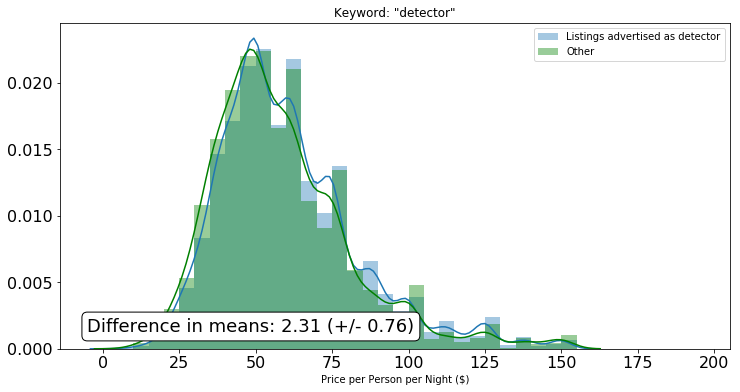

In [44]:
plt.rcParams['figure.figsize'] = [12, 6]
mean_difference(airbnb, 'detector', filters = {'room_type':['Entire home/apt']})


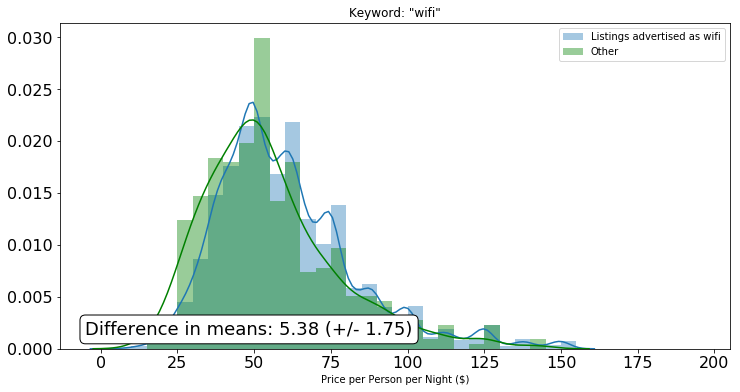

In [45]:
plt.rcParams['figure.figsize'] = [12, 6]
mean_difference(airbnb, 'wifi', filters = {'room_type':['Entire home/apt']})

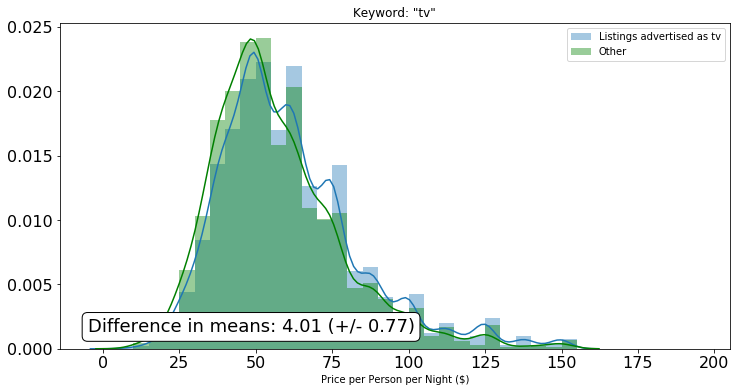

In [46]:
plt.rcParams['figure.figsize'] = [12, 6]
mean_difference(airbnb, 'tv', filters = {'room_type':['Entire home/apt']})

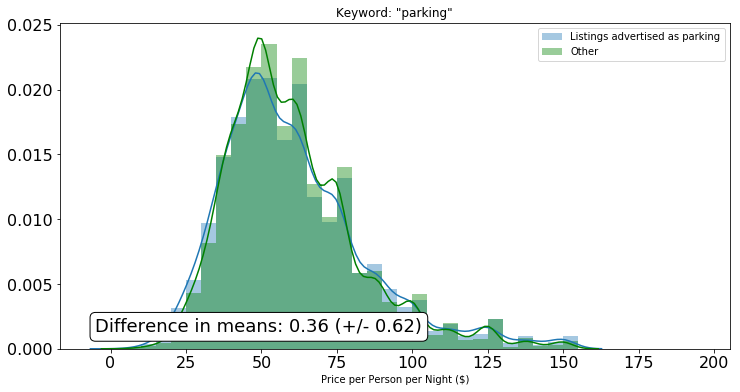

In [47]:
plt.rcParams['figure.figsize'] = [12, 6]
mean_difference(airbnb, 'parking', filters = {'room_type':['Entire home/apt']})

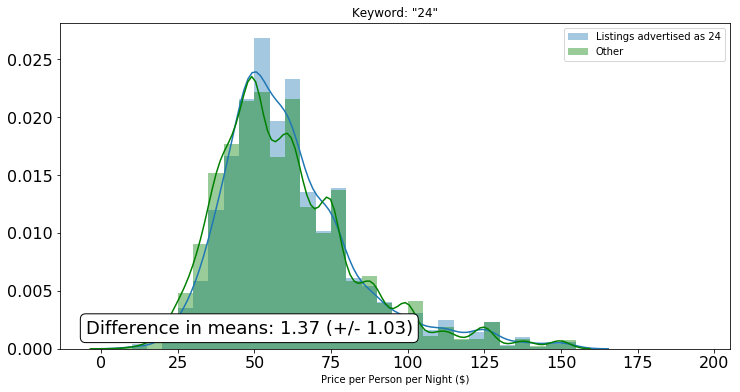

In [48]:
plt.rcParams['figure.figsize'] = [12, 6]
mean_difference(airbnb, '24', filters = {'room_type':['Entire home/apt']})

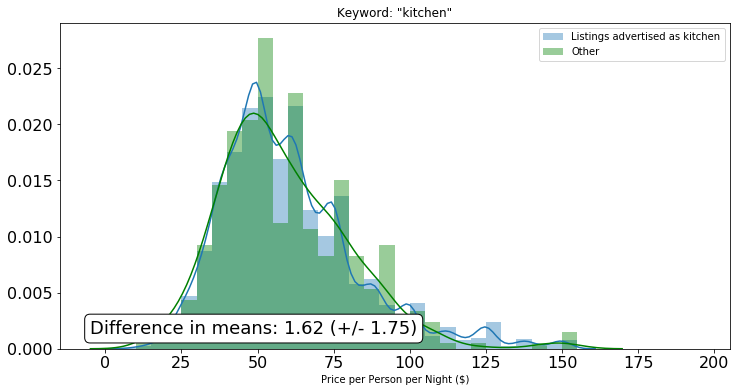

In [49]:
plt.rcParams['figure.figsize'] = [12, 6]
mean_difference(airbnb, 'kitchen', filters = {'room_type':['Entire home/apt']})

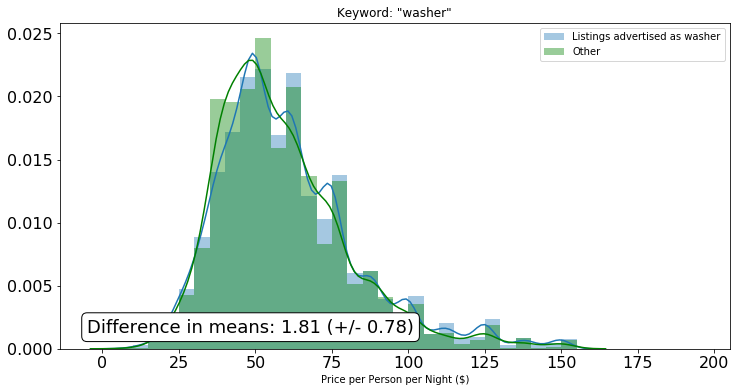

In [50]:
plt.rcParams['figure.figsize'] = [12, 6]
mean_difference(airbnb, 'washer', filters = {'room_type':['Entire home/apt']})

Inference - 

Apartments advertised as detector(Amenities) are on average 2.31 dollars more expensive (per person per night) than other Airbnb apartments in Amsterdam.

Having wifi seems important too in this technology world, as it increases the average price by 5.38 dollars. On the other hand, the apartments advertised as having tv has a difference of 4.01 dollars (per person per night).

Often the Airbnb titles also mention specific amenities that can be seen as value added. Listings with a parking is 0.36 dollars more expensive. This differenec is not huges because if someone rents a whole apartmnet, atleast one parking space is alloted. Sometimes its not. Hence the difference is low.

The apartments that has 24 hours checking is 1.37 dollars more, as this money needs to be given to the security guards as a part of their income. Apartments having kitchen is listed 1.62 dollars more (per person per night),where as having washer would be 1.81 dollar more (per person per night) which includes utility bills and utensils in the kitchen. 
